<a href="https://colab.research.google.com/github/nesviramahdani/Big-Data/blob/main/Multiple_Regression_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#import dataset
from google.colab import drive
drive.mount("/content/gdrive")
datasets = pd.read_csv('/content/gdrive/My Drive/bursa saham newyork.csv')
dataset = datasets[['open', 'close', 'low', 'high']]
#untuk memunculkan 5 data teratas dari dataset.
dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [10]:
#untuk menentukan variabel independen (sumbu X) yaitu Harga Tertinggi dan menentukan variabel dependen (sumbu Y) yaitu Harga Penutup
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [11]:
#pembagian data menjadi dua bagian untuk data training (training set) dan data test (test set), yaitu 80% untuk data training dan 20% untuk data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
#Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Predicting the Test Set results
y_pred = regressor.predict(x_test)

In [15]:
# Comparing the Test Set with Predicted Values

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,197.320007,194.962020
1,24.524999,24.654221
2,61.230000,60.632513
3,35.340000,35.247014
4,24.530001,24.621703
...,...,...
170248,38.639999,38.635307
170249,77.440002,77.920058
170250,32.345001,32.266266
170251,90.190002,89.797401


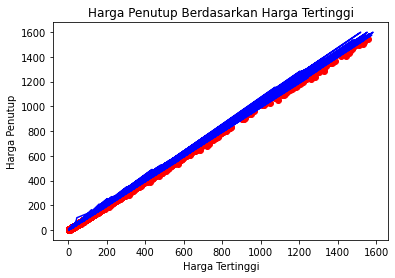

In [29]:
#visualisasi hasil test set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(y_test, x_test[:,0], color ='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()

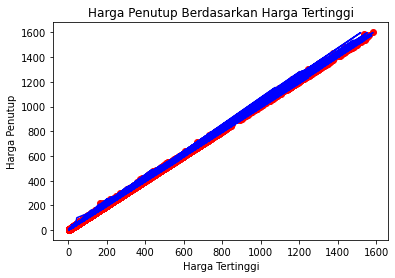

In [34]:
#visualisasi hasil Training Set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_train[:,0], y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()